In [6]:
!git clone https://github.com/eden-chung/RNEAPytorch.git

Cloning into 'RNEAPytorch'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 69 (delta 11), reused 63 (delta 8), pack-reused 0
Receiving objects: 100% (69/69), 224.92 KiB | 1.77 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [7]:
%cd RNEAPytorch

/content/RNEAPytorch


In [ ]:
!pip install torch torchvision -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 91.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinu

In [ ]:
!pip install matplotlib

In [1]:
import torch
import numpy as np

start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)

def main():
    size = 5000  # Define the size of the matrix
    A_np = np.random.rand(size, size)
    B_np = np.random.rand(size, size)

    A_torch = torch.tensor(A_np)
    B_torch = torch.tensor(B_np)

    start.record()
    result_np = np.matmul(A_np, B_np)
    end.record()


if __name__ == "__main__":
    main()

torch.cuda.synchronize()

print("time: ")
print(start.elapsed_time(end))

time: 
6282.1845703125


In [1]:
import torch
import numpy as np

start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)

def main():
    size = 5000  # Define the size of the matrix
    A_np = np.random.rand(size, size)
    B_np = np.random.rand(size, size)

    A_torch = torch.tensor(A_np)
    B_torch = torch.tensor(B_np)

    start.record()
    result_np = torch.matmul(A_torch, B_torch)
    end.record()


if __name__ == "__main__":
    main()

torch.cuda.synchronize()

print("time: ")
print(start.elapsed_time(end))

time: 
6291.44384765625


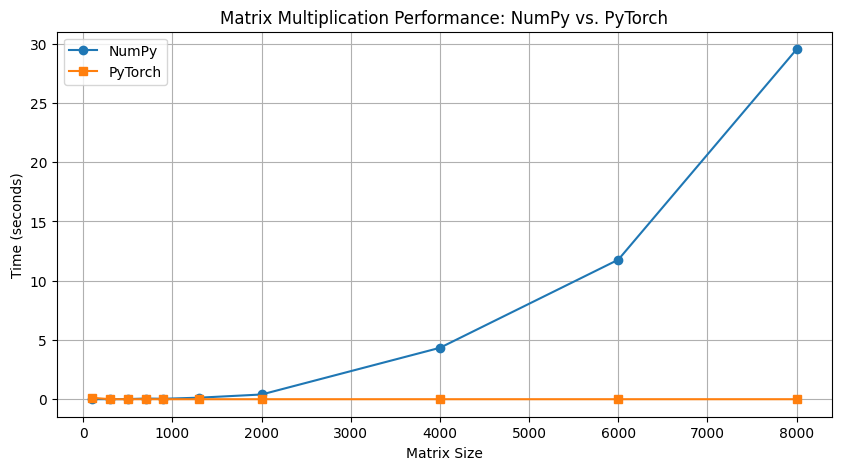

In [4]:
import numpy as np
import torch
import time
import matplotlib.pyplot as plt

def time_matmul_np(size):
    A_np = np.random.rand(size, size)
    B_np = np.random.rand(size, size)
    start_time = time.time()
    _ = np.matmul(A_np, B_np)
    return time.time() - start_time

def time_matmul_torch(size):
    A_torch = torch.rand(size, size)
    B_torch = torch.rand(size, size)

    if torch.cuda.is_available():
        A_torch = A_torch.to('cuda')
        B_torch = B_torch.to('cuda')

    start_time = time.time()
    _ = torch.matmul(A_torch, B_torch)
    return time.time() - start_time

sizes = [100, 300, 500, 700, 900, 1300, 2000, 4000, 6000, 8000]
np_times = [time_matmul_np(size) for size in sizes]
torch_times = [time_matmul_torch(size) for size in sizes]

plt.figure(figsize=(10, 5))
plt.plot(sizes, np_times, label='NumPy', marker='o')
plt.plot(sizes, torch_times, label='PyTorch', marker='s')
plt.xlabel('Matrix Size')
plt.ylabel('Time (seconds)')
plt.title('Matrix Multiplication Performance: NumPy vs. PyTorch')
plt.legend()
plt.grid(True)
plt.show()
